# Online Selection of HLS Representations

In [1]:
from lrcb.bandits.multirep_finite import FiniteMultiBandit
from lrcb.representations.finite_representations import make_random_rep, hls_rank, rank, derank_hls, make_hls_rank
from lrcb.representations.finite_representations import is_cmb, is_hls, spans, hls_lambda, derank_cmb
from lrcb.algos.oful import oful
from lrcb.algos.lr_oful import select_oful
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lrcb.visualization.notebook_utils as nu

## Common settings

In [2]:
nc = 100
na = 5
dim = 20
noise = 0.1
seeds = range(10)

Generate original HLS representation

In [3]:
r0 = make_random_rep(nc, na, dim, normalize=True)
assert is_hls(r0)

OFUL settings

In [4]:
iterations = 1000
reg = 0.1
delta = 0.1
param_bound = 1. #Guaranteed by make_random_rep(..., normalize=True)

## CMB, destructive approach, same parameter

Generate non-HLS equivalent representations with varying HLS rank

In [5]:
reps = [derank_hls(r0, i, transform=False) for i in range(1, dim)]
reps.append(r0)

for i, r in enumerate(reps[:-1]):
    assert r == reps[-1] #All representations are equivalent
    assert np.allclose(r._param, reps[-1]._param) #with the same parameter!
    assert not is_hls(r) #Only the original one is HLS
    assert spans(r) #All representations still span R^d
    print('%d/%d %s' % (hls_rank(r), rank(r), '(CMB)' if is_cmb(r) else ''))
print('%d/%d %s' % (hls_rank(reps[-1]), rank(reps[-1]), '(CMB)' if is_cmb(r) else ''))

#Buldi multi-representation problem
problem = FiniteMultiBandit(nc, na, reps)

1/20 (CMB)
2/20 (CMB)
3/20 (CMB)
4/20 (CMB)
5/20 (CMB)
6/20 (CMB)
7/20 (CMB)
8/20 (CMB)
9/20 (CMB)
10/20 (CMB)
11/20 (CMB)
12/20 (CMB)
13/20 (CMB)
14/20 (CMB)
15/20 (CMB)
16/20 (CMB)
17/20 (CMB)
18/20 (CMB)
19/20 (CMB)
20/20 (CMB)


Regret of OFUL with different representations

In [6]:
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d' % hls_rank(reps[i])
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

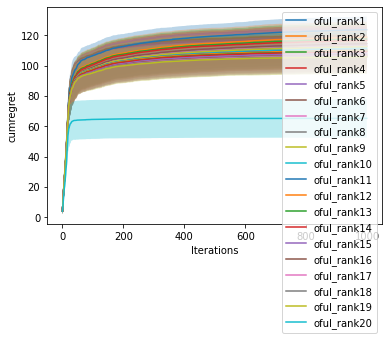

In [7]:
names = ['oful_rank%d' % (i+1) for i in range(dim)]
nu.compare('../logs', names, 'cumregret', seeds)

(Final) cumulated regret is (almost) sorted by hls rank, with the HLS representation having a large advantage

In [8]:
ranking = nu.tournament('../logs', names, 'cumregret', seeds)
ranking

[('oful_rank20', 65.18611851834831),
 ('oful_rank19', 105.80376732392331),
 ('oful_rank18', 106.23105631365522),
 ('oful_rank17', 106.64102718192626),
 ('oful_rank16', 107.06631386791511),
 ('oful_rank15', 108.04145912293772),
 ('oful_rank14', 109.1503012836308),
 ('oful_rank13', 109.4719018580347),
 ('oful_rank12', 110.0870334328097),
 ('oful_rank11', 110.43372577190908),
 ('oful_rank10', 111.41943944291388),
 ('oful_rank9', 112.46344441462483),
 ('oful_rank8', 112.81720061452361),
 ('oful_rank7', 113.08783283096193),
 ('oful_rank6', 114.45872485743841),
 ('oful_rank5', 114.57495959152297),
 ('oful_rank4', 116.63495391650117),
 ('oful_rank3', 117.55078098026033),
 ('oful_rank2', 118.7637850457083),
 ('oful_rank1', 123.66367543571221)]

Regret of model-selection algorithm compared to best model

In [9]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select')

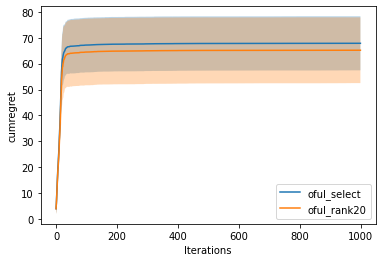

In [10]:
best = ranking[0][0]
nu.compare('../logs', ['oful_select', best], 'cumregret', seeds)

Representations selected by model-selection algorithm

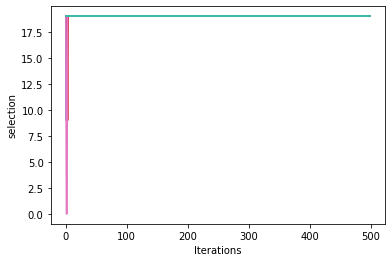

In [11]:
nu.plot_all('../logs', 'oful_select', 'selection', seeds, rows=500)

## CMB, destructive approach, different parameter (t)

Re-use the same original HLS representation

Generate non-HLS **equivalent** representations with varying HLS rank **and different parameters**

In [12]:
reps = [derank_hls(r0, i, transform=True) for i in range(1, dim)] #Random transformation preserving equivalence
reps.append(r0)

for i, r in enumerate(reps[:-1]):
    assert r == reps[-1] #All representations are equivalent
    assert not np.allclose(r._param, reps[-1]._param) #But with different parameters!
    assert not is_hls(r) #Only the original one is HLS
    assert spans(r) #All representations still span R^d
    print('%d/%d %s' % (hls_rank(r), rank(r), '(CMB)' if is_cmb(r) else ''))
print('%d/%d %s' % (hls_rank(reps[-1]), rank(reps[-1]), '(CMB)' if is_cmb(r) else ''))

#Buldi multi-representation problem
problem = FiniteMultiBandit(nc, na, reps)

1/20 (CMB)
2/20 (CMB)
3/20 (CMB)
4/20 (CMB)
5/20 (CMB)
6/20 (CMB)
7/20 (CMB)
8/20 (CMB)
9/20 (CMB)
10/20 (CMB)
11/20 (CMB)
12/20 (CMB)
13/20 (CMB)
14/20 (CMB)
15/20 (CMB)
16/20 (CMB)
17/20 (CMB)
18/20 (CMB)
19/20 (CMB)
20/20 (CMB)


Regret of OFUL with different representations

In [13]:
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d(t)' % hls_rank(reps[i])
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

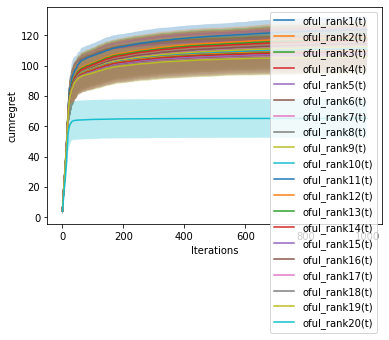

In [14]:
names = ['oful_rank%d(t)' % (i+1) for i in range(dim)]
nu.compare('../logs', names, 'cumregret', seeds)

(Final) cumulated regret is (almost) sorted by hls rank, with the HLS representation having a large advantage

In [15]:
ranking = nu.tournament('../logs', names, 'cumregret', seeds)
ranking

[('oful_rank20(t)', 65.18611851834831),
 ('oful_rank19(t)', 105.80376732392331),
 ('oful_rank18(t)', 106.23105631365509),
 ('oful_rank17(t)', 106.6410271819263),
 ('oful_rank16(t)', 107.06631386791491),
 ('oful_rank15(t)', 108.04145912293771),
 ('oful_rank14(t)', 109.15030128363082),
 ('oful_rank13(t)', 109.4719018580347),
 ('oful_rank12(t)', 110.08703343280976),
 ('oful_rank11(t)', 110.43372577190902),
 ('oful_rank10(t)', 111.41943944291393),
 ('oful_rank9(t)', 112.4634444146247),
 ('oful_rank8(t)', 112.81720061452359),
 ('oful_rank7(t)', 113.08783283096179),
 ('oful_rank6(t)', 114.45872485743837),
 ('oful_rank5(t)', 114.57495959152297),
 ('oful_rank4(t)', 116.63495391650115),
 ('oful_rank3(t)', 117.55078098026043),
 ('oful_rank2(t)', 118.76378504570809),
 ('oful_rank1(t)', 123.66367543571228)]

Regret of model-selection algorithm compared to best model

In [16]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select(t)')

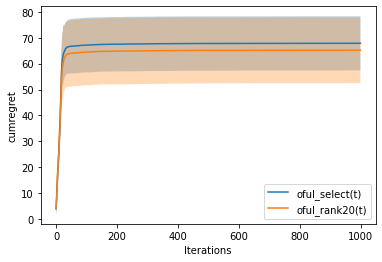

In [17]:
best = ranking[0][0]
nu.compare('../logs', ['oful_select(t)', best], 'cumregret', seeds)

Representations selected by model-selection algorithm

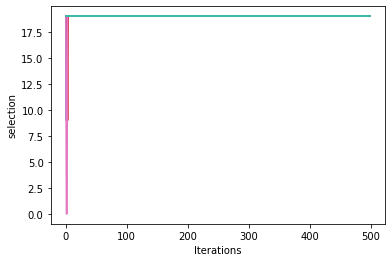

In [18]:
nu.plot_all('../logs', 'oful_select(t)', 'selection', seeds, rows=500)

## CMB, constructive approach (different parameter) (c)

This time I construct a representation of the desired hls rank starting from (the same) reward function

In [19]:
y = r0._rewards

In [20]:
reps = [make_hls_rank(y, dim=dim, rank=i) for i in range(1, dim+1)]

for i, r in enumerate(reps):
    assert np.allclose(r._rewards, y)  #All representations are equivalent
    assert hls_rank(r) == i+1 #But with different HLS ranks
    assert spans(r) #All representations still span R^d
    print('%d/%d %s' % (hls_rank(r), rank(r), '(CMB)' if is_cmb(r) else ''))
    
#Buldi multi-representation problem
problem = FiniteMultiBandit(nc, na, reps)

1/20 (CMB)
2/20 (CMB)
3/20 (CMB)
4/20 (CMB)
5/20 (CMB)
6/20 (CMB)
7/20 (CMB)
8/20 (CMB)
9/20 (CMB)
10/20 (CMB)
11/20 (CMB)
12/20 (CMB)
13/20 (CMB)
14/20 (CMB)
15/20 (CMB)
16/20 (CMB)
17/20 (CMB)
18/20 (CMB)
19/20 (CMB)
20/20 (CMB)


Regret of OFUL with different representations

In [21]:
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d(c)' % hls_rank(reps[i])
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

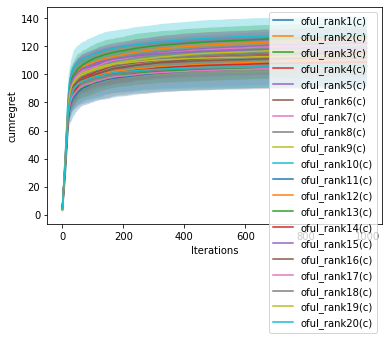

In [22]:
names = ['oful_rank%d(c)' % (i+1) for i in range(dim)]
nu.compare('../logs', names, 'cumregret', seeds)

(Final) cumulated regret

In [23]:
ranking = nu.tournament('../logs', names, 'cumregret', seeds)
ranking

[('oful_rank17(c)', 104.95629823624495),
 ('oful_rank20(c)', 105.7405108299852),
 ('oful_rank11(c)', 105.86071247312664),
 ('oful_rank13(c)', 105.89648487908735),
 ('oful_rank18(c)', 106.18323373368696),
 ('oful_rank14(c)', 108.7187255624016),
 ('oful_rank12(c)', 110.60258000178665),
 ('oful_rank16(c)', 112.02647624226647),
 ('oful_rank19(c)', 113.63142198499443),
 ('oful_rank6(c)', 114.2942935229006),
 ('oful_rank4(c)', 115.95177007957723),
 ('oful_rank8(c)', 116.49652973840602),
 ('oful_rank9(c)', 118.54538083498645),
 ('oful_rank15(c)', 118.686671804303),
 ('oful_rank7(c)', 120.97259496374299),
 ('oful_rank1(c)', 122.35395579403375),
 ('oful_rank5(c)', 122.58844821297843),
 ('oful_rank2(c)', 125.16403288685065),
 ('oful_rank3(c)', 126.95141534093213),
 ('oful_rank10(c)', 128.7218461801019)]

Regret of model-selection algorithm compared to best model

In [24]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select(c)')

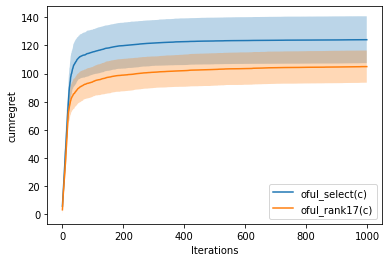

In [25]:
best = ranking[0][0]
nu.compare('../logs', ['oful_select(c)', best], 'cumregret', seeds)

Representations selected by model-selection algorithm

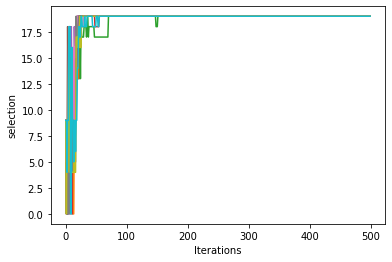

In [26]:
nu.plot_all('../logs', 'oful_select(c)', 'selection', seeds, rows=500)

## Why the difference? (different HLS representations)

Original HLS representation

In [27]:
rA = r0

Constructed HLS representation

In [28]:
rB = make_hls_rank(r0._rewards, dim=dim, rank=dim)

Both are HLS and equivalent

In [29]:
assert rA == rB
assert is_hls(rA)
assert is_hls(rB)

But the performance of OFUL is different

In [30]:
problem = FiniteMultiBandit(nc, na, [rA, rB])

In [31]:
for seed in seeds:
        problem.select_rep(0)
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='ofulA')
        problem.select_rep(1)
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='ofulB')

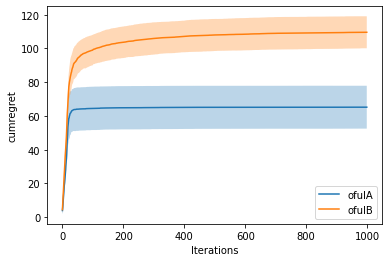

In [32]:
nu.compare('../logs', ['ofulA', 'ofulB'], 'cumregret', seeds)

The reason may be that the minimum eigenvalue of optimal features is different

In [33]:
hls_lambda(rA)

209.31214458285467

In [34]:
hls_lambda(rB)

88.7472186055335

In [35]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_selectAB')

oful_select is able to select the best representation

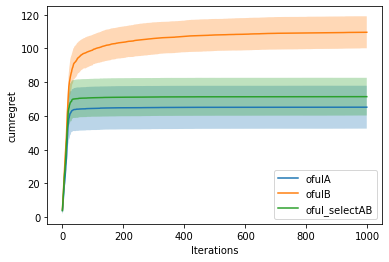

In [36]:
nu.compare('../logs', ['ofulA', 'ofulB', 'oful_selectAB'], 'cumregret', seeds)

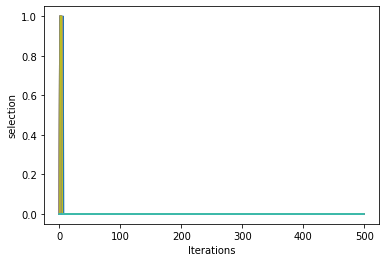

In [37]:
nu.plot_all('../logs', 'oful_selectAB', 'selection', seeds, rows=500)

## Not CMB (destructive, different param) (n)

I make the original representation NOT CMB while preserving HLS

In [38]:
rr = derank_cmb(r0, save_hls=True)
assert rr == r0
assert is_hls(rr)
assert not is_cmb(rr)

In [39]:
reps = [derank_hls(rr, i, transform=True) for i in range(1, dim)] #Random transformation preserving equivalence
reps.append(rr)

for i, r in enumerate(reps[:-1]):
    assert r == reps[-1] #All representations are equivalent
    assert not np.allclose(r._param, reps[-1]._param) #But with different parameters!
    assert not is_hls(r) #Only the original one is HLS
    assert spans(r) #All representations still span R^d
    assert not is_cmb(r) #None of them is CMB
    print('%d/%d %s' % (hls_rank(r), rank(r), '(CMB)' if is_cmb(r) else ''))
print('%d/%d %s' % (hls_rank(reps[-1]), rank(reps[-1]), '(CMB)' if is_cmb(r) else ''))

#Buldi multi-representation problem
problem = FiniteMultiBandit(nc, na, reps)

1/20 
2/20 
3/20 
4/20 
5/20 
6/20 
7/20 
8/20 
9/20 
10/20 
11/20 
12/20 
13/20 
14/20 
15/20 
16/20 
17/20 
18/20 
19/20 
20/20 


Regret of OFUL with different representations

In [40]:
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d(n)' % hls_rank(reps[i])
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

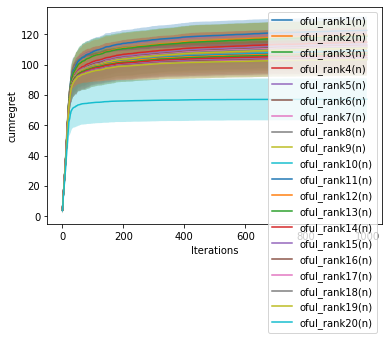

In [41]:
names = ['oful_rank%d(n)' % (i+1) for i in range(dim)]
nu.compare('../logs', names, 'cumregret', seeds)

(Final) cumulated regret is (almost) sorted by hls rank, with the HLS representation having a large advantage

In [42]:
ranking = nu.tournament('../logs', names, 'cumregret', seeds)
ranking

[('oful_rank20(n)', 77.14352367425688),
 ('oful_rank19(n)', 103.21010072913252),
 ('oful_rank18(n)', 103.29092259870356),
 ('oful_rank17(n)', 103.69394917271174),
 ('oful_rank16(n)', 104.29965149126437),
 ('oful_rank15(n)', 104.83176721223072),
 ('oful_rank14(n)', 105.9604465791659),
 ('oful_rank13(n)', 107.02168564818058),
 ('oful_rank12(n)', 107.73381724762287),
 ('oful_rank11(n)', 108.1903002669947),
 ('oful_rank10(n)', 109.15261501240323),
 ('oful_rank9(n)', 110.82399211157706),
 ('oful_rank8(n)', 111.51371540244881),
 ('oful_rank7(n)', 112.01486558449861),
 ('oful_rank6(n)', 112.58278793339748),
 ('oful_rank5(n)', 113.33881201459454),
 ('oful_rank4(n)', 114.80204510666859),
 ('oful_rank3(n)', 118.65158378265544),
 ('oful_rank2(n)', 119.437606722759),
 ('oful_rank1(n)', 122.54047256163275)]

Regret of model-selection algorithm compared to best model

In [43]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select(n)')

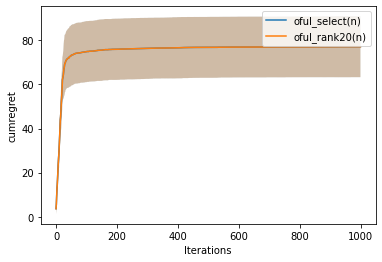

In [44]:
best = ranking[0][0]
nu.compare('../logs', ['oful_select(n)', best], 'cumregret', seeds)

Representations selected by model-selection algorithm

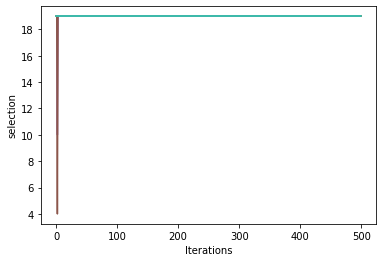

In [45]:
nu.plot_all('../logs', 'oful_select(n)', 'selection', seeds, rows=500)

In [46]:
hls_lambda(rr)

115.48436718868297

In [47]:
hls_lambda(r0)

209.31214458285467